> # **Polynomial Linear Regression**
> - Polynomial Regression is a form of regression analysis where the relationship between the independent variable 𝑋 and the dependent variable 𝑌 is 𝑛-th degree polynomial in 𝑋

> ### Why Use Polynomial Regression?
> - `Capturing Non-Linearity`: Linear models may not adequately capture complex relationships in the data. Polynomial regression can model curves and bends in the data more accurately.
> - `Flexibility`: By increasing the degree of the polynomial, you can fit the model more closely to the data. However, `higher degrees also risk overfitting` (fitting noise in the data), so it's essential to balance model complexity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # Dimentionality Increase
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# y = 0.6x^2 + 0.1x + 2.3 + Some Noise
np.random.seed(2)
X = 6 * np.random.randn(200) + 3
y = (0.6*X**2) - (0.1*X) + 2.3 + np.random.randint(-50, 50, size = 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

> # **Simple Linear Regression**

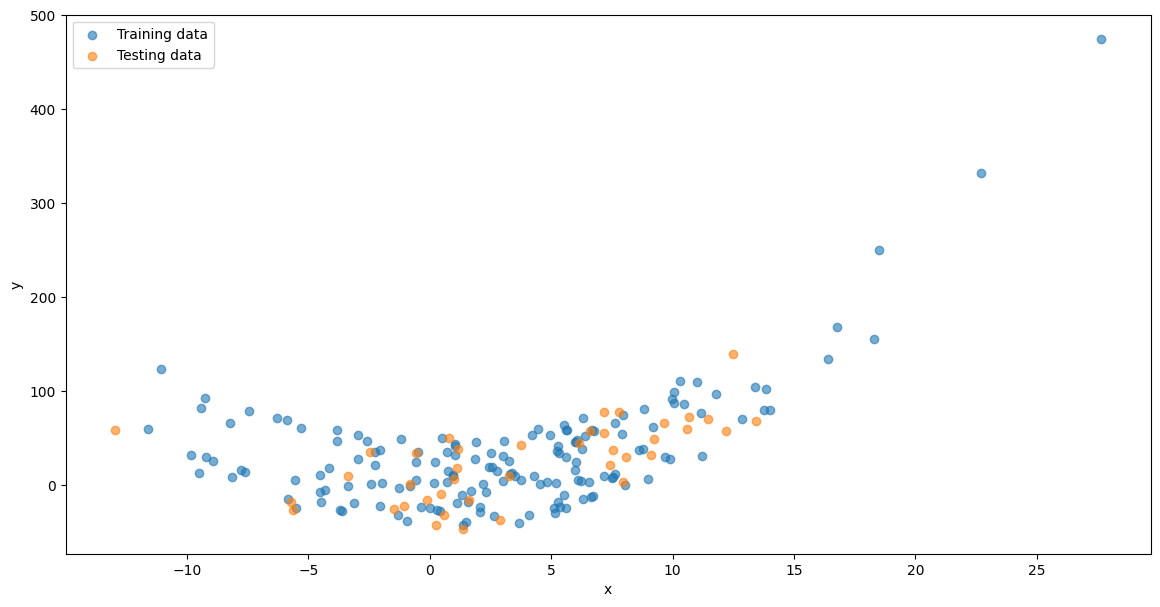

In [3]:
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.scatter(X_test, y_test, alpha = 0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data'])
plt.show()

In [4]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [5]:
print(lr.coef_, lr.intercept_)

[4.75979249] 19.658276932076884


In [6]:
y_pred = lr.predict(X_test.reshape(-1, 1))
r2_score(y_test, y_pred)

0.2577903973559794

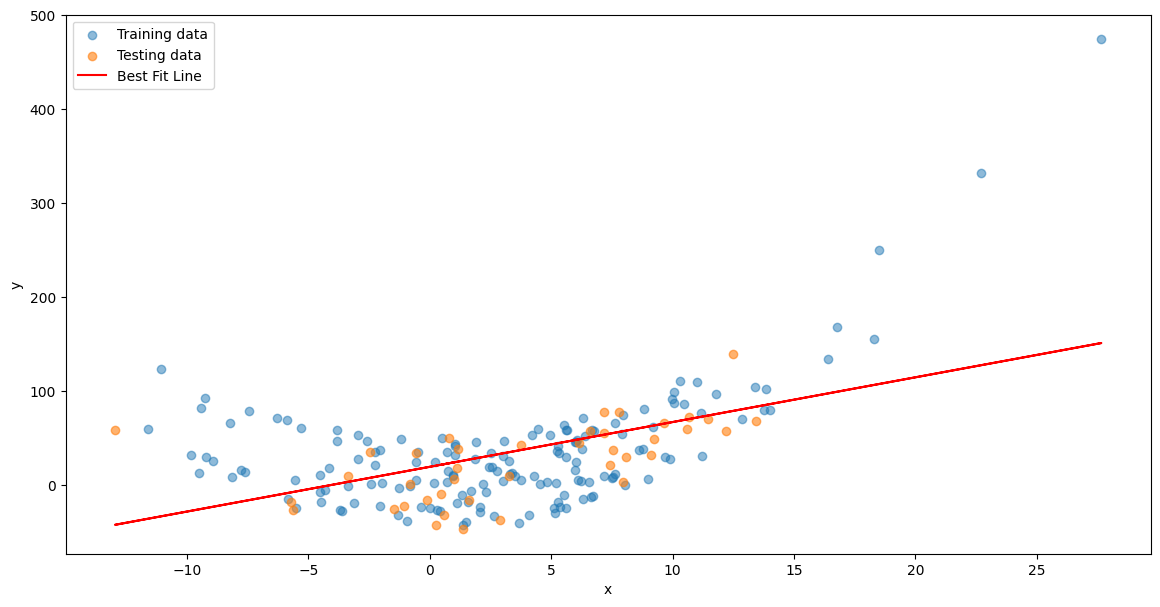

In [7]:
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, alpha = 0.5)
plt.scatter(X_test, y_test, alpha = 0.6)
plt.plot(X, lr.predict(X.reshape(-1, 1)), color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data' , 'Best Fit Line'])
plt.show()

<hr>

> # **Polynomial Regression**

In [12]:
poly = PolynomialFeatures(degree = 4, include_bias=True)
x_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
x_test_trans = poly.transform(X_test.reshape(-1, 1))

> PolynomialFeatures(degree=d) transforms an array containing n features into an array containing `(n + d)! / (d! * n!)` features,

In [13]:
x_train_trans[:5]
# 1st column : x^0
# 2nd column : x^1
# 3nd column : x^2
# 4nd column : x^3
# 5nd column : x^4

array([[ 1.00000000e+00, -9.20079928e+00,  8.46547073e+01,
        -7.78890970e+02,  7.16641947e+03],
       [ 1.00000000e+00,  6.31898564e+00,  3.99295796e+01,
         2.52314440e+02,  1.59437133e+03],
       [ 1.00000000e+00,  3.00005857e+00,  9.00035142e+00,
         2.70015814e+01,  8.10063256e+01],
       [ 1.00000000e+00,  9.67068204e-01,  9.35220911e-01,
         9.04422406e-01,  8.74638152e-01],
       [ 1.00000000e+00,  1.05851958e+00,  1.12046370e+00,
         1.18603276e+00,  1.25543890e+00]])

In [14]:
poly_lr = LinearRegression()
poly_lr.fit(x_train_trans, y_train)

LinearRegression()

In [15]:
y_pred = poly_lr.predict(x_test_trans)
r2_score(y_test, y_pred)

0.47780125648803495

In [16]:
print(poly_lr.coef_, poly_lr.intercept_)

[ 0.00000000e+00 -1.13291167e-01  5.34758272e-01  2.45932013e-04
  1.13665583e-04] 4.397309340144346


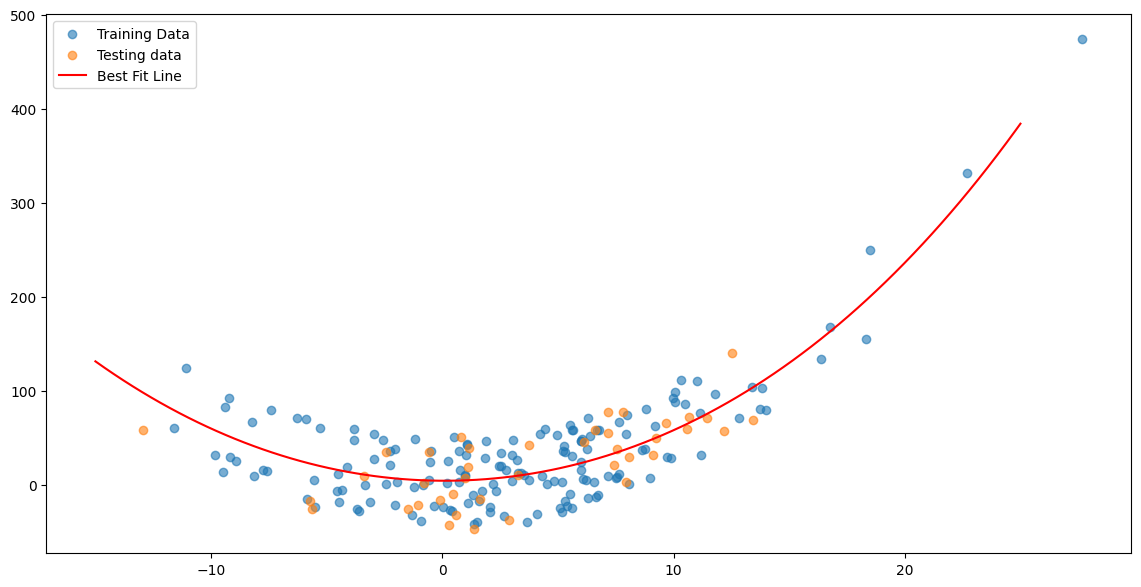

In [20]:
x_new = np.linspace(-15, 25, num = 200)
x_new_trans = poly.transform(x_new.reshape(-1, 1))
y_new = poly_lr.predict(x_new_trans)

plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, label = 'Training Data', alpha = 0.6)
plt.scatter(X_test, y_test, label = 'Testing data', alpha = 0.6)
plt.plot(x_new, y_new, color = 'red', label = 'Best Fit Line')
plt.legend()
plt.show()

> ### Effect of `degrees`
> - `Higher degrees` tends to `overfitting`
> - `Lower degrees` tends to `underfitting`

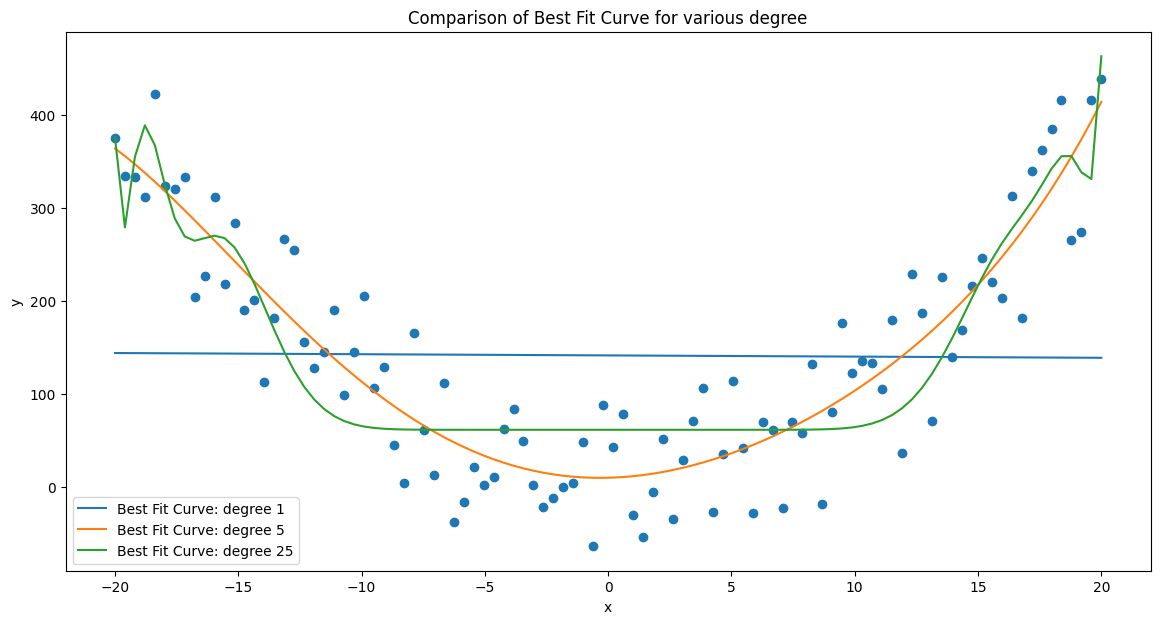

In [21]:
def polynomial_regressor(X, y, degree = 5):
    feture_model = PolynomialFeatures(degree=degree)
    X = feture_model.fit_transform(X.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X, y.reshape(-1, 1))
    y_pred = model.predict(X)
    return y_pred

degrees = [1, 5, 25]
temp_x = np.linspace(-20, 20, 100)
temp_y = (temp_x**2) - (temp_x) + 2.3 + np.random.randint(-100, 100, size = 100)
plt.figure(figsize=(14, 7))
plt.scatter(temp_x, temp_y)
for degree in degrees:
    y_pred = polynomial_regressor(temp_x, temp_y, degree=degree)
    plt.plot(temp_x, y_pred, label = f"Best Fit Curve: degree {degree}")

plt.xlabel('x')
plt.ylabel('y')
plt.title("Comparison of Best Fit Curve for various degree")
plt.legend()
plt.show()

<hr>

> ### Learning Curves
> 1. `Underfitting`: If both the training and validation errors are high and relatively close to each other, it indicates that the model is too simple to capture the underlying patterns in the data. This is known as underfitting.
> 2. `Overfitting`: If the training error is very low while the validation error is high, it indicates that the model is too complex and is capturing noise in the training data rather than generalizing to unseen data. This is known as overfitting.
> 3. `Interpretation`: If both the training and validation errors are low and the curves are close together, it indicates that the model is well-fitted. It captures the underlying patterns in the data without overfitting or underfitting.

[]

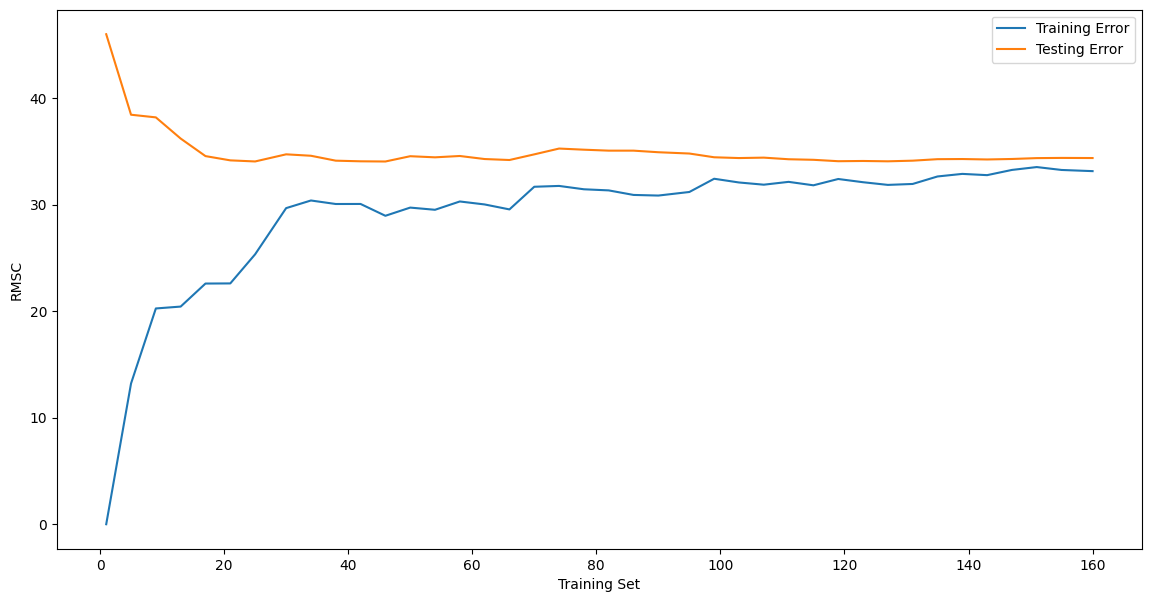

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), 
    X.reshape(-1, 1), 
    y.reshape(-1, 1), 
    train_sizes=np.linspace(0.01, 1, 40), 
    cv = 5, 
    scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_errors, label = "Training Error")
plt.plot(train_sizes, valid_errors, label = "Testing Error")
plt.xlabel("Training Set")
plt.ylabel("RMSC")
plt.legend()
plt.plot()

# **Polynomial Regression using Gradient Descent**

(0.0, 50.0)

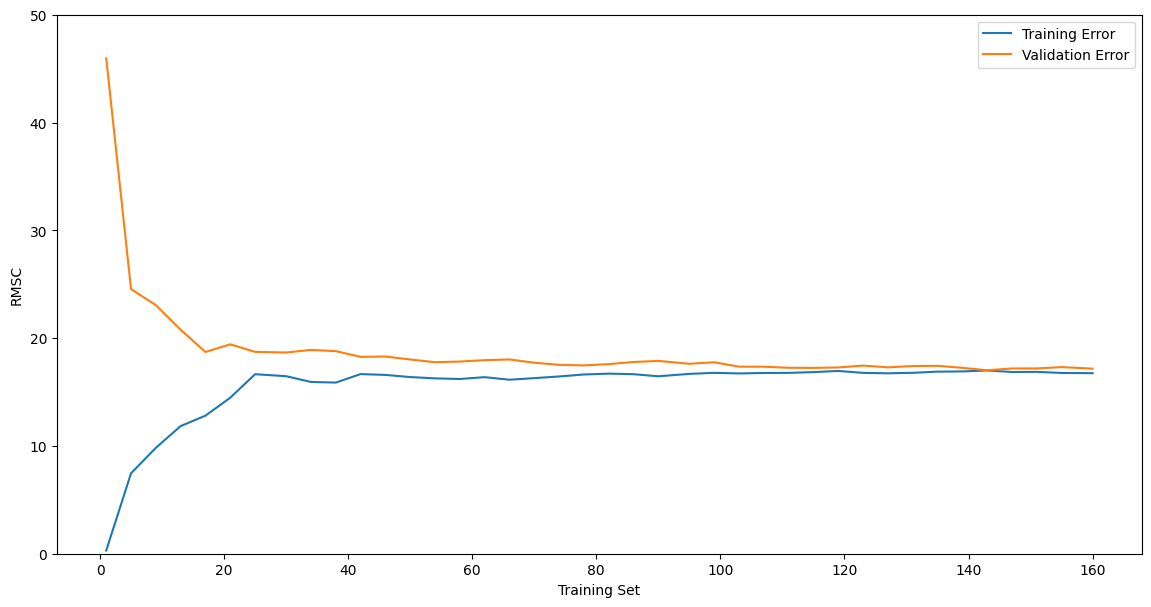

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

pr = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), 
    SGDRegressor(
        loss='squared_error',
        penalty='l2',
        learning_rate='constant',
        eta0=0.01,
        max_iter=10000,
        alpha=0.001,
        n_iter_no_change=500,
        tol=0.001
    ))

train_sizes, train_scores, valid_scores = learning_curve(
    pr, X.reshape(-1, 1), y, train_sizes=np.linspace(0.01, 1, 40), cv = 5, scoring = 'neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_errors, label = "Training Error")
plt.plot(train_sizes, valid_errors, label= "Validation Error")
plt.xlabel("Training Set")
plt.ylabel("RMSC")
plt.legend()
plt.ylim(0, 50)

> `The error on the training data is much lower than with the Linear Regression
model.`
